In [1]:
from gensim.models import Word2Vec

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

# DANE

In [2]:
sentences = []

for i in range(100_000):
    start = np.random.randint(0,10)
    finish = start + np.random.randint(1,20)
    sentence = [ str(x) for x in range(start,finish) ]
    
    sentences.append(sentence)

# Model Word2Vec

In [3]:
# min_count - ile razy słowo musi wystąpić, żeby zacząć brać je pod uwagę
model = Word2Vec(sentences, size=10, window=5, min_count=1)

In [4]:
model.wv['1']

array([-0.84543693,  4.512342  , -0.70208037,  2.6753662 ,  0.9820916 ,
        0.05254396,  1.6022407 ,  1.4688263 , -4.943538  ,  1.505746  ],
      dtype=float32)

In [5]:
def plot_heatmap(model):

    plt.figure(figsize=(15,8))
    sns.heatmap(model.wv[model.wv.vocab], linewidths=0.5)

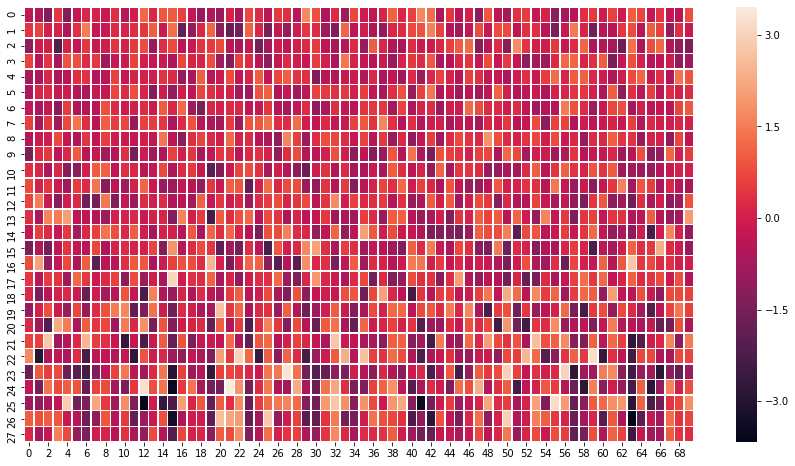

In [6]:
plot_heatmap(Word2Vec(sentences, size=70, window=7, min_count=3))

## PCA

In [7]:
def plot_pca(model):
    X = model.wv[model.wv.vocab]
    pca_model = PCA(n_components=2)
    result = pca_model.fit_transform(X)

    plt.figure(figsize=(8,5))
    plt.scatter(result[:,0], result[:,1])

    words = list(model.wv.vocab)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i,1]))

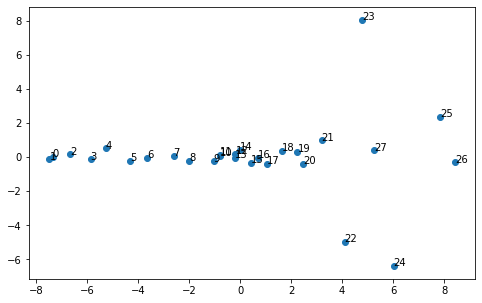

In [9]:
plot_pca(Word2Vec(sentences, size=70, window=7, min_count=3))

## Podobne słowa

In [12]:
model = Word2Vec(sentences, size=300, window=7, min_count=3)

In [13]:
model.wv.most_similar('2', topn=3)

[('0', 0.37774360179901123),
 ('1', 0.2538028359413147),
 ('4', 0.2265608012676239)]

In [15]:
# operacje matematyczne:
# 2 + 2 - 2
model.wv.most_similar(positive=['2','2'], negative=['2'], topn=3)

[('0', 0.37774360179901123),
 ('1', 0.2538028359413147),
 ('4', 0.2265608161687851)]

In [16]:
# 10 + 5 - 2
model.wv.most_similar(positive=['10','5'], negative=['2'], topn=3)

[('24', 0.24590666592121124),
 ('23', 0.18252894282341003),
 ('16', 0.16857141256332397)]